In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/공모전/데이터/학습용/데이터변환2.csv")
df.head()

,Unnamed: 0,시간,속도,교통량,일자,요일,지점번호,방향,거리,차선수,기능유형구분,합류도로수,제한속도,주말 유무
0,0,0,58.43,116,20220302,2,C-19,0,1228,3,0,2,60,0
1,1,1,57.97,92,20220302,2,C-19,0,1228,3,0,2,60,0
2,2,2,61.02,102,20220302,2,C-19,0,1228,3,0,2,60,0
3,3,3,61.25,174,20220302,2,C-19,0,1228,3,0,2,60,0
4,4,4,57.99,447,20220302,2,C-19,0,1228,3,0,2,60,0


In [4]:
from sklearn.model_selection import train_test_split
x = df[['시간','교통량',	'요일','방향',	'거리',	'차선수',	'합류도로수',	'제한속도',	'주말 유무']]
y = df[['속도']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [5]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [6]:
y_predict = mlr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

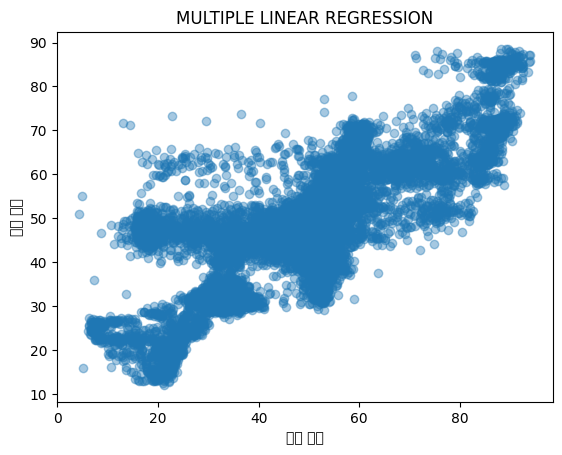

In [8]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("실제 속도")
plt.ylabel("예측 속도")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [9]:
print(mlr.coef_)

[[-2.12944091e-01 -7.84453256e-03 -8.09241394e-03  3.61747041e+00
  -1.82707134e-02  1.15530169e+01 -1.79435287e+00  1.35399697e+00
   1.30927688e+00]]


In [11]:
((y_test - y_predict) ** 2).sum()

속도    1.684675e+06
dtype: float64

In [12]:
((y - y.mean()) ** 2).sum()

속도    2.224036e+07
dtype: float64

In [13]:
print(mlr.score(x_train, y_train))

0.6185902004017692


In [ ]:
61%의 정확도를 보이는게 선형회귀, 지금까지 가장 높은 정확도를 보임.